<a href="https://colab.research.google.com/github/czymara/czymara.github.io/blob/master/_teaching/BERTopic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Go to Runtime -> Change runtime type -> Set "Hardware Accelerater" to "GPU" (if not set already)
---



# BERTopic example
BERTopic is a topic modeling technique that leverages transformers and c-TF-IDF to create dense clusters allowing for easily interpretable topics whilst keeping important words in the topic descriptions. BERTopic supports all kinds of topic modeling techniques.

More information can be found in the [documentation](https://maartengr.github.io/BERTopic/getting_started/quickstart/quickstart.html), [Github](https://github.com/MaartenGr/BERTopic) and in a [preprint](https://arxiv.org/abs/2203.05794)



To install BERTopic, use the following command:

In [ ]:
pip install bertopic

## Data set
Newsgroup - The fetch_20newsgroups dataset is a collection of ~18,000 newsgroup documents from 20 different newsgroups


In [ ]:
from sklearn.datasets import fetch_20newsgroups

docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']

In [ ]:
print(docs[0])
print("type of object docs: ", type(docs))
# keep the first half
docs = docs[:len(docs)//2]
print("number of documents: ", len(docs))



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!


type of object docs:  <class 'list'>
number of documents:  9423


Should I preprocess the data?

No. By using document embeddings there is typically no need to preprocess the data as all parts of a document are important in understanding the general topic of the document. Although this holds in 99% of cases, if you have data that contains a lot of noise, for example, HTML-tags, then it would be best to remove them. HTML-tags typically do not contribute to the meaning of a document and should therefore be removed. However, if you apply topic modeling to HTML-code to extract topics of code, then it becomes important.

## Run BERTopic


Use `BERTopic(language="multilingual")` to select a model that supports 50+ languages.

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs)


After generating topics and their probabilities, we can access the frequent topics that were generated:


In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,3527,-1_the_to_of_and,"[the, to, of, and, is, in, that, it, for, you]",[\n\nI assume you are posting to encourage com...
1,0,880,0_game_he_team_was,"[game, he, team, was, games, play, 10, players...",[The FLYERS blew a 3-0 lead over the Buffalo S...
2,1,369,1_key_encryption_clipper_be,"[key, encryption, clipper, be, entry, to, the,...","[Enclosed are the rules, guidelines and relate..."
3,2,274,2_cheek_ditto_hello_why,"[cheek, ditto, hello, why, unfortunately, hi, ...","[Hello,, \n\nDitto,, \n \n ..."
4,3,228,3_israel_jews_israeli_arab,"[israel, jews, israeli, arab, arabs, ed, jewis...","[\n\n""Assuming""? Also: come on, Brad. If we ar..."
...,...,...,...,...,...
123,122,10,122_kuwait_sheikh_iraq_arabia,"[kuwait, sheikh, iraq, arabia, saudi, kuwaiti,...","[\nThe whole ""saddam is going to invade Saudi ..."
124,123,10,123_circuit_design_circuits_electronics,"[circuit, design, circuits, electronics, audio...","[: HI, I was wondering if anyone would be able..."
125,124,10,124_stacker_compression_dos_doublespace,"[stacker, compression, dos, doublespace, qemm,...",[\nStacker achieves better compression ratio t...
126,125,10,125_gas_tear_gun_projectile,"[gas, tear, gun, projectile, chamber, canister...",[\n >They used a tank to knock a hole in the...


## Visualisation

In [ ]:
topic_model.visualize_barchart()

 -1 refers to all outliers and should typically be ignored. Next, let's take a look at the most frequent topic that was generated, topic 0:


In [ ]:
topic_model.get_topic(0)


[('game', 0.012284953851666143),
 ('he', 0.009639448924918732),
 ('team', 0.009558770591509802),
 ('was', 0.007331571273490287),
 ('games', 0.007200338660967195),
 ('play', 0.007079045960974252),
 ('10', 0.007022386075990132),
 ('players', 0.006940370575697818),
 ('the', 0.006663329754243767),
 ('his', 0.006623310738060287)]

In [ ]:
topic_model.get_document_info(docs)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,\n\nI am sure some bashers of Pens fans are pr...,0,0_game_he_team_was,"[game, he, team, was, games, play, 10, players...",[The FLYERS blew a 3-0 lead over the Buffalo S...,game - he - team - was - games - play - 10 - p...,1.000000,False
1,My brother is in the market for a high-perform...,4,4_card_monitor_video_vga,"[card, monitor, video, vga, drivers, windows, ...",[I have a Radius Precision Color 24x video car...,card - monitor - video - vga - drivers - windo...,1.000000,False
2,\n\n\n\n\tFinally you said what you dream abou...,-1,-1_the_to_of_and,"[the, to, of, and, is, in, that, it, for, you]",[\n\nI assume you are posting to encourage com...,the - to - of - and - is - in - that - it - fo...,0.000000,False
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,11,11_scsi_scsi2_scsi1_drive,"[scsi, scsi2, scsi1, drive, drives, ide, contr...",[The above does not tell the proper story of S...,scsi - scsi2 - scsi1 - drive - drives - ide - ...,0.562400,False
4,1) I have an old Jasmine drive which I cann...,119,119_tape_tapes_marker_backup,"[tape, tapes, marker, backup, drive, holes, 25...",[\n\tGreetings. There are 3 types of warnings ...,tape - tapes - marker - backup - drive - holes...,0.902397,False
...,...,...,...,...,...,...,...,...
9418,\nAssume in this case the usual canard-adversa...,1,1_key_encryption_clipper_be,"[key, encryption, clipper, be, entry, to, the,...","[Enclosed are the rules, guidelines and relate...",key - encryption - clipper - be - entry - to -...,1.000000,False
9419,\n\nIt is a long standing good luck Redwing's ...,0,0_game_he_team_was,"[game, he, team, was, games, play, 10, players...",[The FLYERS blew a 3-0 lead over the Buffalo S...,game - he - team - was - games - play - 10 - p...,1.000000,False
9420,\nWhich translates to 7% not satisfied. I don...,-1,-1_the_to_of_and,"[the, to, of, and, is, in, that, it, for, you]",[\n\nI assume you are posting to encourage com...,the - to - of - and - is - in - that - it - fo...,0.000000,False
9421,\nThe willingness of the majority of the peopl...,98,98_government_libertarians_libertarian_regulation,"[government, libertarians, libertarian, regula...",[\nI'm afraid that I've lost the thread here. ...,government - libertarians - libertarian - regu...,1.000000,False


# Reduce topic outliers
By default, BERTopic generates outliers which is helpful in creating meaningful topic representations. However, you might want to assign every single document to a topic. We can use .reduce_outliers to map some or all outliers to a topic or use are several different ways to reduce outliers.

## Assign to existing topics

In [ ]:
# Reduce outliers
reduced_outliers_topics = topic_model.reduce_outliers(docs, topics)



In [ ]:
topic_model.update_topics(docs, topics=reduced_outliers_topics)

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,930,0_game_he_team_was,"[game, he, team, was, 10, games, play, players...",[The FLYERS blew a 3-0 lead over the Buffalo S...
1,1,612,1_be_key_to_encryption,"[be, key, to, encryption, the, clipper, is, of...","[Enclosed are the rules, guidelines and relate..."
2,2,279,2_why_bertrand_ypu_stereotype,"[why, bertrand, ypu, stereotype, resend, disap...","[Hello,, \n\nDitto,, \n \n ..."
3,3,285,3_israel_israeli_jews_arab,"[israel, israeli, jews, arab, jewish, arabs, o...","[\n\n""Assuming""? Also: come on, Brad. If we ar..."
4,4,315,4_card_monitor_video_vga,"[card, monitor, video, vga, drivers, windows, ...",[I have a Radius Precision Color 24x video car...
...,...,...,...,...,...
122,122,10,122_kuwait_sheikh_iraq_arabia,"[kuwait, sheikh, iraq, arabia, saudi, kuwaiti,...","[\nThe whole ""saddam is going to invade Saudi ..."
123,123,18,123_electronics_circuit_circuits_design,"[electronics, circuit, circuits, design, elect...","[: HI, I was wondering if anyone would be able..."
124,124,27,124_dos_mpc_2500_3500,"[dos, mpc, 2500, 3500, 1500, 2000, 3000, stack...",[\nStacker achieves better compression ratio t...
125,125,23,125_gas_tear_gun_projectile,"[gas, tear, gun, projectile, chamber, cs, nont...",[\n >They used a tank to knock a hole in the...


## Change clustering algorithm

In [ ]:
from bertopic import BERTopic
from sklearn.cluster import KMeans

cluster_model = KMeans(n_clusters=50)
topic_model_kmeans = BERTopic(hdbscan_model=cluster_model)
topicsKmeans, probsKmeans = topic_model_kmeans.fit_transform(docs)

topic_model_kmeans.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,938,0_car_the_it_and,"[car, the, it, and, engine, to, for, on, in, c...","[\n\n*nnnnnnnng* Thank you for playing, I cann..."
1,1,796,1_of_to_is_and,"[of, to, is, and, the, in, it, that, for, my]","[Hi,\n\nI've just returned from a visit with m..."
2,2,771,2_he_the_year_in,"[he, the, year, in, game, his, to, and, that, ...",[\nI agree and disagree. John is saying that ...
3,3,715,3_key_the_to_encryption,"[key, the, to, encryption, of, be, is, and, cl...",[Note: This file will also be available via a...
4,4,690,4_maxaxaxaxaxaxaxaxaxaxaxaxaxaxax_window_the_to,"[maxaxaxaxaxaxaxaxaxaxaxaxaxaxax, window, the,...","[Hi,\n\n Please reply to me direct as I am no..."
5,5,662,5_bike_you_the_my,"[bike, you, the, my, to, and, on, it, of, in]",[\nI'll tell you my story as an example of wha...
6,6,583,6_the_fbi_they_was,"[the, fbi, they, was, that, to, of, koresh, ba...",[NOTE - local tx groups trimmed out of Newsgro...
7,7,566,7_game_the_he_team,"[game, the, he, team, in, was, to, season, and...",[As the Sharks' season came to a close tonight...
8,8,531,8_the_of_that_in,"[the, of, that, in, and, is, to, god, church, he]",[THE EMPTY TOMB: CAN WE TRUST IT?\n\n ...
9,9,526,9_ites_cheek_yep_huh,"[ites, cheek, yep, huh, ken, why, tell, each, ...","[\nYep.\n, ites:, \n \n ..."


In [ ]:
topic_model_kmeans.get_document_info(docs)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Representative_document
0,\n\nI am sure some bashers of Pens fans are pr...,7,7_game_the_he_team,"[game, the, he, team, in, was, to, season, and...",[As the Sharks' season came to a close tonight...,game - the - he - team - in - was - to - seaso...,False
1,My brother is in the market for a high-perform...,28,28_card_drivers_video_driver,"[card, drivers, video, driver, cards, ati, dia...",[Hi there. We just bought a 486 DX2/66 Gatewa...,card - drivers - video - driver - cards - ati ...,False
2,\n\n\n\n\tFinally you said what you dream abou...,36,36_armenian_the_were_and,"[armenian, the, were, and, of, armenians, in, ...",[Accounts of Anti-Armenian Human Rights Violat...,armenian - the - were - and - of - armenians -...,False
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,14,14_drive_scsi_drives_disk,"[drive, scsi, drives, disk, ide, controller, h...",[Computer Equipment Garage Sale:\n\nI've final...,drive - scsi - drives - disk - ide - controlle...,False
4,1) I have an old Jasmine drive which I cann...,13,13_for_drive_and_price,"[for, drive, and, price, sale, with, ram, or, ...","[Hello fellow humans, and other net creatures....",for - drive - and - price - sale - with - ram ...,False
...,...,...,...,...,...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,1,1_of_to_is_and,"[of, to, is, and, the, in, it, that, for, my]","[Hi,\n\nI've just returned from a visit with m...",of - to - is - and - the - in - it - that - fo...,False
18842,\nNot in isolated ground recepticles (usually ...,35,35_wire_the_wiring_ground,"[wire, the, wiring, ground, is, to, battery, y...",[\nNo. No. NOOO!!!\n\nThe ground (green) wir...,wire - the - wiring - ground - is - to - batte...,False
18843,I just installed a DX2-66 CPU in a clone mothe...,20,20_mhz_cpu_simms_the,"[mhz, cpu, simms, the, with, speed, is, it, ch...","[N(P>Just got a 66MHz 486DX2 system, and am co...",mhz - cpu - simms - the - with - speed - is - ...,False
18844,\nWouldn't this require a hyper-sphere. In 3-...,22,22_for_and_the_file,"[for, and, the, file, of, entry, to, image, in...",[Archive-name: macintosh/general-faq\nVersion:...,for - and - the - file - of - entry - to - ima...,False


# Guided topic model

In [ ]:
docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))["data"]

seed_topic_list = [["drug", "cancer", "drugs", "doctor"],
                   ["windows", "drive", "dos", "file"],
                   ["space", "launch", "orbit", "lunar"]]

topic_model = BERTopic(seed_topic_list=seed_topic_list)
topics, probs = topic_model.fit_transform(docs)

# After generating topics and their probabilities, we can access the frequent topics that were generated:

topic_model.get_topic_info()



,Topic,Count,Name,Representation,Representative_Docs
0,-1,7134,-1_to_the_is_and,"[to, the, is, and, of, you, it, for, in, that]",[\nThat was my point. If I play poker with Mon...
1,0,1813,0_game_team_games_he,"[game, team, games, he, players, season, hocke...","[I finally got it back, with great thanks to M..."
2,1,545,1_key_clipper_chip_encryption,"[key, clipper, chip, encryption, keys, escrow,...","[[An article from comp.org.eff.news, EFFector ..."
3,2,529,2_ites_hello_cheek_hi,"[ites, hello, cheek, hi, yep, huh, ken, ignore...","[Hi,, Hello,, ites:]"
4,3,324,3_gun_guns_firearms_militia,"[gun, guns, firearms, militia, amendment, crim...",[\n\n This seems a strange argument to m...
...,...,...,...,...,...
199,198,10,198_wincom_logo_icon_windows,"[wincom, logo, icon, windows, file, startup, r...",[\nThat isn't enough to change your Windows st...
200,199,10,199_wasps_chiggers_polish_skin,"[wasps, chiggers, polish, skin, bite, painful,...","[\nI'll probably get flamed for this, but when..."
201,200,10,200_48bit_bits_screen_image,"[48bit, bits, screen, image, bit, buffer, colo...",[I was recently talking to a possible employer...
202,201,10,201_bitmap_format_ths_manual,"[bitmap, format, ths, manual, colours, exactly...",[: >What exactly does the windows bitmap forma...


In [ ]:
topic_model.visualize_barchart(n_words= 8, top_n_topics=10)

In [ ]:
topic_model.get_document_info(docs)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,\n\nI am sure some bashers of Pens fans are pr...,0,0_game_team_games_he,"[game, team, games, he, players, season, hocke...","[I finally got it back, with great thanks to M...",game - team - games - he - players - season - ...,1.000000,False
1,My brother is in the market for a high-perform...,9,9_card_drivers_diamond_ati,"[card, drivers, diamond, ati, driver, video, w...",[I have uploaded the most recent Windows drive...,card - drivers - diamond - ati - driver - vide...,0.981137,False
2,\n\n\n\n\tFinally you said what you dream abou...,52,52_were_armenians_they_azerbaijan,"[were, armenians, they, azerbaijan, her, was, ...",[Accounts of Anti-Armenian Human Right Violati...,were - armenians - they - azerbaijan - her - w...,0.993025,False
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,-1,-1_to_the_is_and,"[to, the, is, and, of, you, it, for, in, that]",[\nThat was my point. If I play poker with Mon...,to - the - is - and - of - you - it - for - in...,0.000000,False
4,1) I have an old Jasmine drive which I cann...,151,151_tape_backup_munroe_wangdat,"[tape, backup, munroe, wangdat, drive, 4mm, 65...","[Acorn Software, Inc. has 3 tape drives (curre...",tape - backup - munroe - wangdat - drive - 4mm...,0.816603,False
...,...,...,...,...,...,...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,10,10_cancer_medical_patients_doctor,"[cancer, medical, patients, doctor, hiv, 17129...",[I can not believe the way this thread on cand...,cancer - medical - patients - doctor - hiv - 1...,0.856805,False
18842,\nNot in isolated ground recepticles (usually ...,-1,-1_to_the_is_and,"[to, the, is, and, of, you, it, for, in, that]",[\nThat was my point. If I play poker with Mon...,to - the - is - and - of - you - it - for - in...,0.000000,False
18843,I just installed a DX2-66 CPU in a clone mothe...,97,97_fan_cpu_heat_sink,"[fan, cpu, heat, sink, fans, cooling, chip, ho...","[N(P>Just got a 66MHz 486DX2 system, and am co...",fan - cpu - heat - sink - fans - cooling - chi...,0.839992,False
18844,\nWouldn't this require a hyper-sphere. In 3-...,142,142_den_sphere_radius_points,"[den, sphere, radius, points, plane, ellipse, ...","[\nHere is one by Andrew ""Graphics Gems"" Glass...",den - sphere - radius - points - plane - ellip...,1.000000,False


# South Park example

In [ ]:
import pandas as pd

# Only first 5 episodes
urls = ["https://raw.githubusercontent.com/BobAdamsEE/SouthParkData/master/by-season/Season-{}.csv".format(i) for i in range(1, 20)]


south_park_data = pd.concat([pd.read_csv(url) for url in urls[0:5]])
south_park_data.head()

,Season,Episode,Character,Line
0,1,1,Boys,"School day, school day, teacher's golden ru...\n"
1,1,1,Kyle,"Ah, damn it! My little brother's trying to fol..."
2,1,1,Ike,Zeeponanner.\n
3,1,1,Kyle,"Ike, you can't come to school with me. \n"
4,1,1,Cartman,"Yeah, go home you little dildo.\n"


In [ ]:
main_characters = ["Cartman", "Kyle", "Stan", "Kenny"]
south_park_data = south_park_data[south_park_data['Character'].isin(main_characters)]
south_park_data.head()

,Season,Episode,Character,Line
1,1,1,Kyle,"Ah, damn it! My little brother's trying to fol..."
3,1,1,Kyle,"Ike, you can't come to school with me. \n"
4,1,1,Cartman,"Yeah, go home you little dildo.\n"
5,1,1,Kyle,"Dude, don't call my brother a dildo!\n"
6,1,1,Stan,What's a dildo?\n


In [ ]:
south_park_docs = south_park_data['Line']
south_park_docs[1]

1    Ah, damn it! My little brother's trying to fol...
1                                              What?\n
Name: Line, dtype: object

In [ ]:
sp_topic_model = BERTopic()
sp_topics, sp_probs = sp_topic_model.fit_transform(south_park_docs)

In [ ]:
# After generating topics and their probabilities, we can access the frequent topics that were generated:
sp_topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2887,-1_cartman_it_to_you,"[cartman, it, to, you, that, the, this, have, ...","[I can't go with you guys right now.\n, Come o..."
1,0,163,0_kyle_kyles_bitch_kidney,"[kyle, kyles, bitch, kidney, brother, friend, ...","[Kyle!\n, Kyle?\n, Kyle!\n]"
2,1,147,1_jesus_lord_sins_confess,"[jesus, lord, sins, confess, church, cross, cr...","[Lights, please. And there were in the same c..."
3,2,134,2_kenny_kennys_ha_mccormick,"[kenny, kennys, ha, mccormick, picture, shotgu...","[Kenny!\n, Kenny?\n, (Kenny!)\n]"
4,3,125,3_stan_tunh_stans_homo,"[stan, tunh, stans, homo, ants, cream, friend,...","[Stan! Stan!\n, Stan!\n, Stan.\n]"
...,...,...,...,...,...
249,248,10,248_cartman_socks_advice_christs,"[cartman, socks, advice, christs, hike, sake, ...","[Cartman, you hike me the ball, then somebody ..."
250,249,10,249_chicken_chickens_tenders_louisianabaked,"[chicken, chickens, tenders, louisianabaked, s...","[Go on and go home, you fat chicken!\n, No, Ki..."
251,250,10,250_problem_thanks_noo_frida,"[problem, thanks, noo, frida, lot, heh, heheh,...","[No problem, Gorak.\n, Heheh, heh, no problem,..."
252,251,10,251_eeyy_whoopee_whatabutt_whoopie,"[eeyy, whoopee, whatabutt, whoopie, eeeyy, eee...","[Eeyy!\n, Eeyy!\n, Eeyy!!\n]"


## Remove stopwords and infrequent terms

One component of BERTopic is the CountVectorizer. The min_df parameter is used to indicate the minimum frequency of words.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Fine-tune topic representations after training BERTopic
vectorizer_model = CountVectorizer(stop_words="english", ngram_range=(1, 3), min_df=10)
sp_topic_model.update_topics(south_park_docs, vectorizer_model=vectorizer_model)

In [ ]:
sp_topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2887,-1_cartman_thats_mom_isnt,"[cartman, thats, mom, isnt, play, like, youre,...","[I can't go with you guys right now.\n, Come o..."
1,0,163,0_kyle_bitch_friend_shes,"[kyle, bitch, friend, shes, looking, youd, too...","[Kyle!\n, Kyle?\n, Kyle!\n]"
2,1,147,1_jesus_night_send_god,"[jesus, night, send, god, hell, needs, eat, sa...","[Lights, please. And there were in the same c..."
3,2,134,2_kenny_ha_die_sick,"[kenny, ha, die, sick, moms, hate, chance, lis...","[Kenny!\n, Kenny?\n, (Kenny!)\n]"
4,3,125,3_stan_best_friend_kill,"[stan, best, friend, kill, telling, wendy, tha...","[Stan! Stan!\n, Stan!\n, Stan.\n]"
...,...,...,...,...,...
249,248,10,248_throw_cartman_havent_matter,"[throw, cartman, havent, matter, trying, hell,...","[Cartman, you hike me the ball, then somebody ..."
250,249,10,249_bunch_dude just_eyes_mind,"[bunch, dude just, eyes, mind, making, whoa du...","[Go on and go home, you fat chicken!\n, No, Ki..."
251,250,10,250_thanks_lot_heh_heheh,"[thanks, lot, heh, heheh, dick, dude, yeah, , , ]","[No problem, Gorak.\n, Heheh, heh, no problem,..."
252,251,10,251____,"[, , , , , , , , , ]","[Eeyy!\n, Eeyy!\n, Eeyy!!\n]"


## Topics per Class

In [ ]:
classes = south_park_data["Character"]

In [ ]:
topics_per_class = sp_topic_model.topics_per_class(south_park_docs, classes=classes)

In [ ]:
sp_topic_model.visualize_topics_per_class(topics_per_class, top_n_topics=10)

# Bigger Picture



*   BERTopic is a topic modeling technique that uses transformers
*   Mostly it allows for easily interpretable topics
*   BERTopic generates document embedding with pre-trained transformer-based language models.

*   BERTopic supports all kinds of topic modeling techniques. Check out the documentation and find the right settings for your usecase
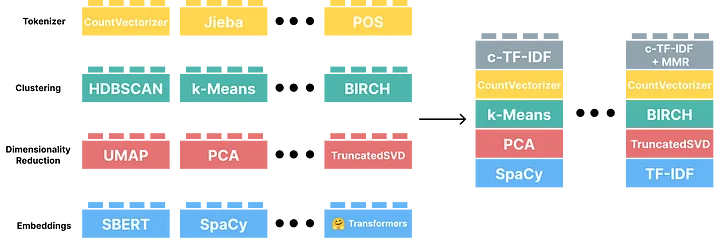


https://maartengr.github.io/BERTopic/getting_started/quickstart/quickstart.html

https://github.com/MaartenGr/BERTopic